# K-Means Clustering

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Naiwen1997/IDNE-577-Machine-Learning/blob/master/Unsupervised%20Learning/Lecture%201%20K-Means%20Clustering/K-Means_clustering.ipynb)

In [2]:
# !pip install ucimlrepo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

In [3]:
df=pd.concat((X,y),axis=1)
df

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


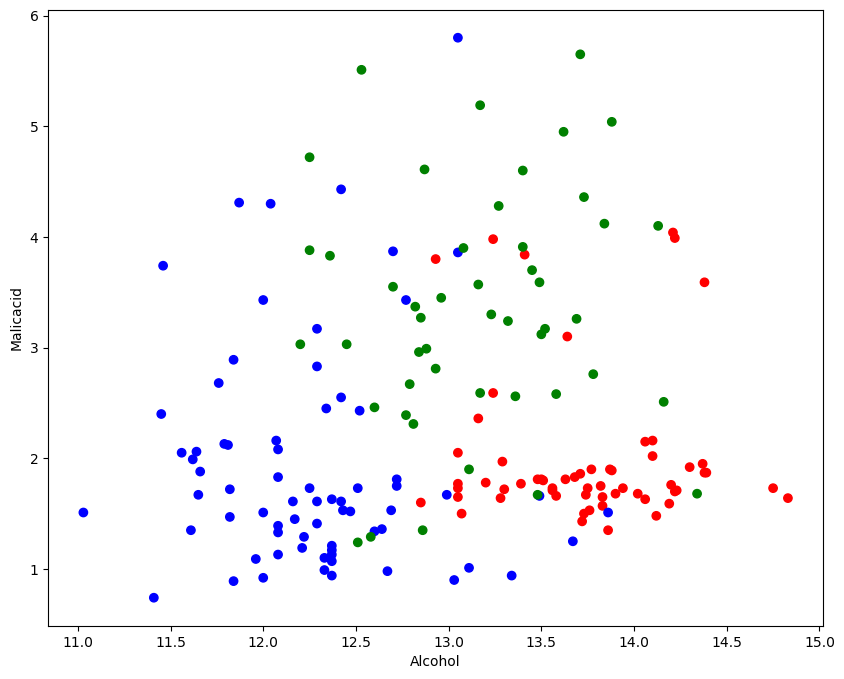

In [4]:
color=['red' if label==1 else 'blue' if label==2 else 'green' for label in df['class']]

plt.figure(figsize=(10,8))
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=color)
plt.xlabel('Alcohol')
plt.ylabel('Malicacid')
plt.show()

In [6]:
X=df.iloc[:,:2].to_numpy()

In [5]:
class k_means_clustering():
    def __init__(self, k = 3, max_iter = 100, epsilon = 0.01) -> None:
        self.X = None
        self.k = k
        self.max_iter = max_iter
        self.epsilon = epsilon
        self.centroid_history = None
        self.final_centroids = None

    def fit(self, X):
        self.X = X
        C_old = self.initialize_centroids()
        C_new = self.new_centroids(C_old)
        self.centroid_history = [C_old, C_new]
        centroid_distances = [self.distance(p[0], p[1]) for p in zip(C_old, C_new)]

        iter = 0
        while max(centroid_distances) > self.epsilon and iter<self.max_iter:
            C_old, C_new = C_new, self.new_centroids(C_new)
            self.centroid_history.append(C_new)
            centroid_distances = [self.distance(p[0], p[1]) for p in zip(C_old, C_new)]
            iter += 1
        self.final_centroids = C_new

    def initialize_centroids(self):
        centroids = []
        for _ in range(self.k):
            i = np.random.randint(len(self.X))
            centroids.append(self.X[i, :])
        return centroids

    def new_centroids(self, centroids):
        new_centroids = []
        A = self.make_classes(centroids)
        for i in range(len(centroids)):
            if len(A[i])>0:
                new_centroids.append(1/len(A[i])*sum(A[i])) 
        return new_centroids

    def distance(self, a, b):
        return np.sqrt((a-b)@(a-b))

    def clustering(self, x, centroids):
        distances = np.array([self.distance(x, centroid) for centroid in centroids])
        return np.argmin(distances)

    def make_classes(self, centroids):
        A = dict()
        for i in range(len(centroids)):
            A[i] = []
        for x in self.X:
            A[self.clustering(x, centroids)].append(x)
        return A

    def predict_classes(self, data, centroids):
        A = dict()
        for i in range(len(centroids)):
            A[i] = []
        for x in data:
            A[self.clustering(x, centroids)].append(x)
        return A
    
    def mse_classes(self, centroids):
        errors = []
        A_classes = self.make_classes(centroids)
        for i, centroid in enumerate(centroids):
            error = sum(.5*(centroid-a)@(centroid-a) for a in A_classes[i])
            errors.append(error)
        return sum(errors)

In [8]:
k_means = k_means_clustering(k=3, max_iter=100, epsilon=0.01)
k_means.fit(X)

[array([13.705     ,  1.78606061]), array([13.0632,  3.8948]), array([12.20032258,  1.66532258])]


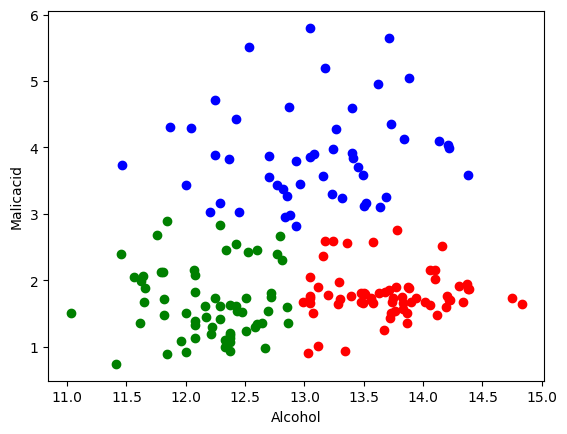

In [10]:
centroids = k_means.final_centroids
print(centroids)

clusters = k_means.predict_classes(X, k_means.final_centroids)
for label, _ in clusters.items():
    for x in clusters[label]:
        if label == 0:
            plt.scatter(x[0],x[1],color = "red")
        elif label == 1:
            plt.scatter(x[0],x[1],color = "blue")
        else:
            plt.scatter(x[0],x[1],color = "green")
plt.xlabel('Alcohol')
plt.ylabel('Malicacid')
plt.show()

In [11]:
k_means = k_means_clustering(k=4, max_iter=100, epsilon=0.01)
k_means.fit(X)

[array([13.19833333,  4.325     ]), array([12.82333333,  2.94694444]), array([12.17566038,  1.4809434 ]), array([13.74932203,  1.72101695])]


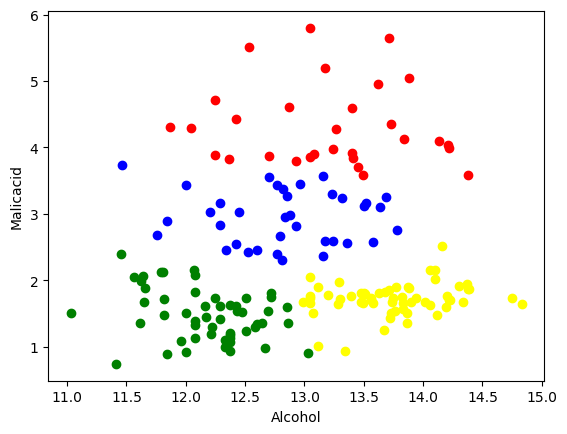

In [12]:
centroids = k_means.final_centroids
print(centroids)

clusters = k_means.predict_classes(X, k_means.final_centroids)
for label, _ in clusters.items():
    for x in clusters[label]:
        if label == 0:
            plt.scatter(x[0],x[1],color = "red")
        elif label == 1:
            plt.scatter(x[0],x[1],color = "blue")
        elif label == 2:
            plt.scatter(x[0],x[1],color = "green")
        else:
            plt.scatter(x[0],x[1],color='yellow')
plt.xlabel('Alcohol')
plt.ylabel('Malicacid')
plt.show()

In [13]:
def k_means_compare(k, max_iter, epsilon):
    mse_list = []
    
    for j in range(1,k):
        k_means = k_means_clustering(k, max_iter, epsilon)
        k_means.fit(X)
        
        centroids = k_means.final_centroids
        mse = k_means.mse_classes(centroids)
        mse_list.append(mse)
        errors = [k_means.mse_classes(centroid) for centroid in k_means.centroid_history]
        
        #plot the MSE for a given k over a given number of iterations
        plt.figure()
        plt.plot([i for i in range(1,len(errors)+1)], errors)
        plt.title(f'{j+1} Clusters')
        plt.xlabel('iteration')
        plt.ylabel("MSE")
        plt.show()
        
        print("Centroids for", j + 1, "clusters:", centroids)
        print("MSE for", j + 1, "clusters:", round(mse, 3))

    #plot the MSE over the values of k to determine which k is best
    plt.figure()
    plt.plot([i for i in range(2,len(mse_list)+2)], mse_list)
    plt.xlabel('k')
    plt.ylabel("MSE")
    plt.show()

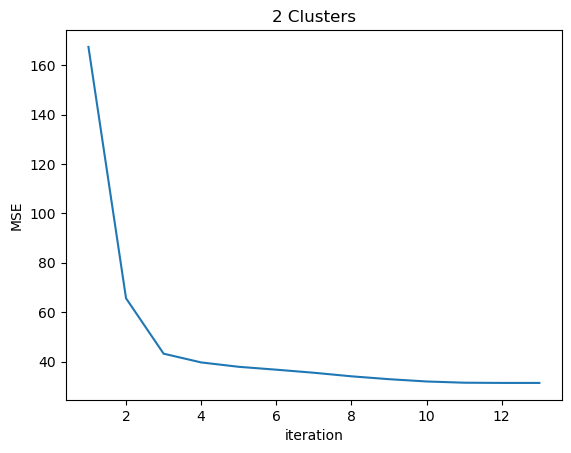

Centroids for 2 clusters: [array([13.13444444,  4.40259259]), array([13.2484,  3.1032]), array([13.76034483,  1.73327586]), array([12.06217391,  2.53304348]), array([12.28311111,  1.34733333])]
MSE for 2 clusters: 31.33


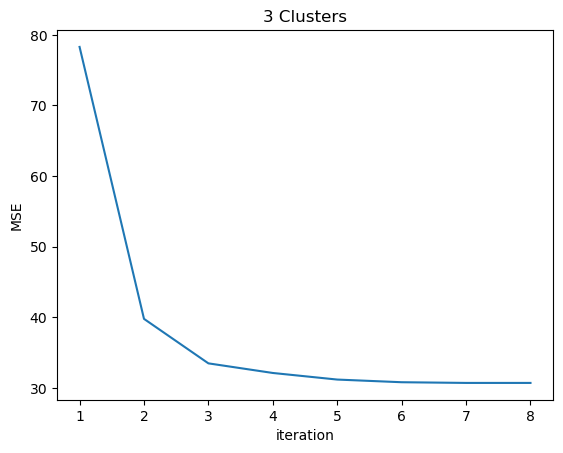

Centroids for 3 clusters: [array([12.17566038,  1.4809434 ]), array([12.56391304,  2.79086957]), array([13.74704918,  1.75213115]), array([12.90083333,  4.92583333]), array([13.32586207,  3.69655172])]
MSE for 3 clusters: 30.725


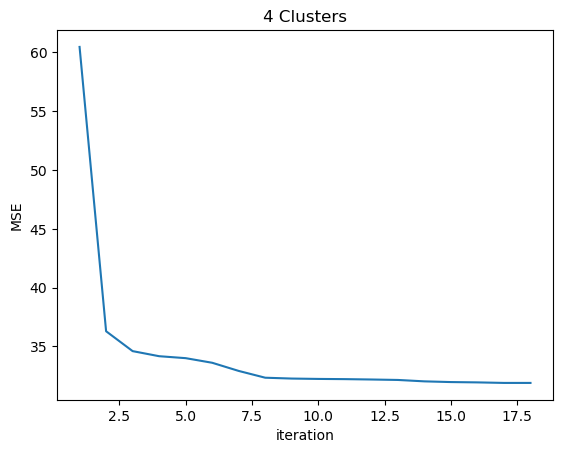

Centroids for 4 clusters: [array([12.09446809,  1.47978723]), array([13.26214286,  4.35857143]), array([12.73514286,  3.03142857]), array([13.20466667,  1.65      ]), array([14.01210526,  1.80736842])]
MSE for 4 clusters: 31.895


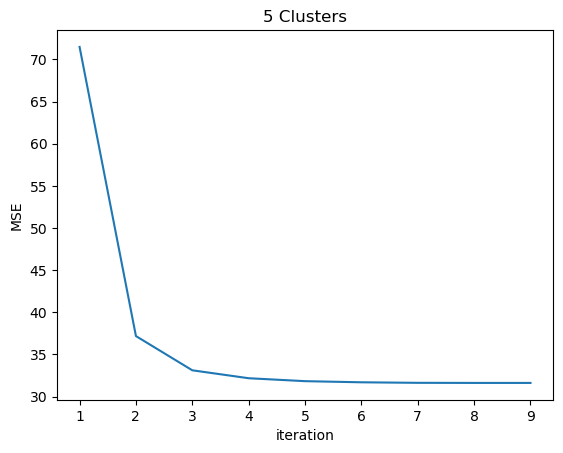

Centroids for 5 clusters: [array([12.29847826,  1.35434783]), array([12.11761905,  2.40904762]), array([13.60066667,  4.65533333]), array([12.86363636,  3.60151515]), array([13.73650794,  1.81428571])]
MSE for 5 clusters: 31.619


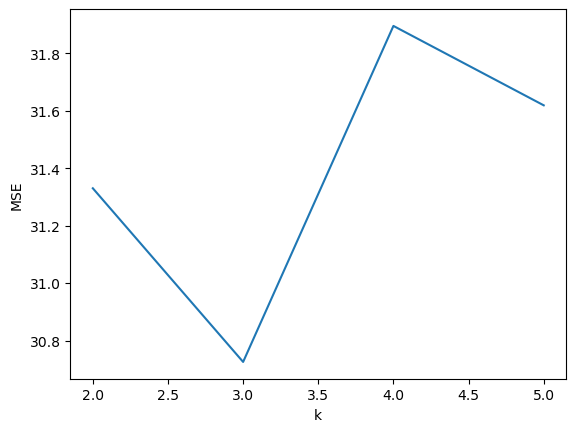

In [14]:
k_means_compare(5, 100, 0.01)

# Using Sklearn

In [16]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3,random_state=40)
k_means.fit(X)

c:\Users\pangnaiwen\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pangnaiwen\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=40)

In [17]:
y_pred_kmeans = k_means.predict(X)
y_pred_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1,
       2, 1])

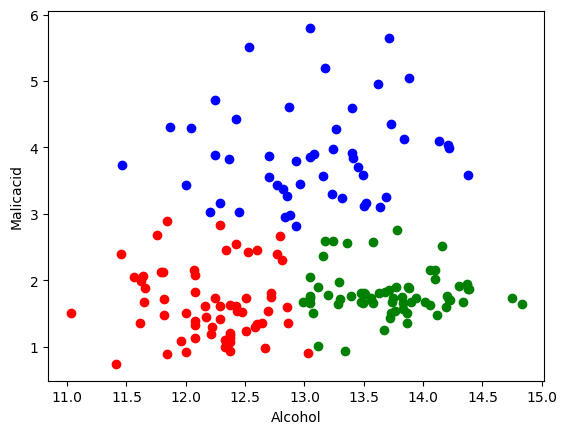

In [20]:
for i, label in enumerate(y_pred_kmeans):
    if label == 0:
        plt.scatter(X[i,0],X[i,1],color = "red")
    elif label == 1:
        plt.scatter(X[i,0],X[i,1],color = "blue")
    else:
        plt.scatter(X[i,0],X[i,1],color='green')
plt.xlabel('Alcohol')
plt.ylabel('Malicacid')
plt.show()

# Conclusion and Discussion

The model evaluation shows that perceptron is capable of predicting the type of rice with a very high accuracy. A summary of the results obtained is:

1. The perceptron is able to achieve a testing accuracy of 92%.
2. The precision of the percepron is 95% and 9o% respectively for Cammeo and Osmancik rice.